## EDA And Feature Engineering Of Google Play Store Dataset

1) Problem statement.
Today, 1.85 million different apps are available for users to download. Android users have even more from which to choose, with 2.56 million available through the Google Play Store. These apps have come to play a huge role in the way we live our lives today. Our Objective is to find the Most Popular Category, find the App with largest number of installs , the App with largest size etc.
2) Data Collection.

The data consists of 20 column and 10841 rows.

### Steps We Are Going to Follow
1. Data Clearning
2. Exploratory Data Analysis
3. Feature Engineering

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')
%matplotlib inline

In [6]:
df = pd.read_csv('googleplaystore.csv')

In [9]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [13]:
# Summary of the dataset
df.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


In [14]:
df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

### Insights and observations 
The dataset has some missing values

In [16]:
df['Reviews'].unique()

array(['159', '967', '87510', ..., '603', '1195', '398307'], dtype=object)

In [17]:
df['Reviews'].str.isnumeric().sum()

np.int64(10840)

In [ ]:
df[-df['Reviews'].str.isnumeric()] # give me record thst is not numeric

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [22]:
df_copy = df.copy()

In [25]:
df_copy = df_copy.drop(df_copy.index[10472])

In [27]:
df_copy[-df_copy['Reviews'].str.isnumeric()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


In [33]:
## Convert datatype to review
df_copy['Reviews'] = df_copy['Reviews'].astype(int)

In [35]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10840 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10840 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          9366 non-null   float64
 3   Reviews         10840 non-null  int64  
 4   Size            10840 non-null  object 
 5   Installs        10840 non-null  object 
 6   Type            10839 non-null  object 
 7   Price           10840 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10840 non-null  object 
 10  Last Updated    10840 non-null  object 
 11  Current Ver     10832 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), int64(1), object(11)
memory usage: 1.2+ MB


In [52]:
df_copy['Size'].unique()

array(['19000', '14000', '8.7000', '25000', '2.8000', '5.6000', '29000',
       '33000', '3.1000', '28000', '12000', '20000', '21000', '37000',
       '2.7000', '5.5000', '17000', '39000', '31000', '4.2000', '7.0000',
       '23000', '6.0000', '6.1000', '4.6000', '9.2000', '5.2000', '11000',
       '24000', 'Varies with device', '9.4000', '15000', '10000',
       '1.2000', '26000', '8.0000', '7.9000', '56000', '57000', '35000',
       '54000', '201 ', '3.6000', '5.7000', '8.6000', '2.4000', '27000',
       '2.5000', '16000', '3.4000', '8.9000', '3.9000', '2.9000', '38000',
       '32000', '5.4000', '18000', '1.1000', '2.2000', '4.5000', '9.8000',
       '52000', '9.0000', '6.7000', '30000', '2.6000', '7.1000', '3.7000',
       '22000', '7.4000', '6.4000', '3.2000', '8.2000', '9.9000',
       '4.9000', '9.5000', '5.0000', '5.9000', '13000', '73000', '6.8000',
       '3.5000', '4.0000', '2.3000', '7.2000', '2.1000', '42000',
       '7.3000', '9.1000', '55000', '23 ', '6.5000', '1.5000', 

In [45]:
df_copy['Size'].isnull().sum()

np.int64(0)

In [53]:
df_copy['Size']=df_copy['Size'].str.replace('M','000') # converting millions into thousand 
df_copy['Size']=df_copy['Size'].str.replace('k',' ')
df_copy['Size']=df_copy['Size'].replace('Varies with device',np.nan)
df_copy['Size']=df_copy['Size'].astype(float)

In [50]:
df_copy['Size']

0                     19000
1                     14000
2                    8.7000
3                     25000
4                    2.8000
                ...        
10836                 53000
10837                3.6000
10838                9.5000
10839    Varies with device
10840                 19000
Name: Size, Length: 10840, dtype: object

In [55]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10840 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10840 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          9366 non-null   float64
 3   Reviews         10840 non-null  int64  
 4   Size            9145 non-null   float64
 5   Installs        10840 non-null  object 
 6   Type            10839 non-null  object 
 7   Price           10840 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10840 non-null  object 
 10  Last Updated    10840 non-null  object 
 11  Current Ver     10832 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(2), int64(1), object(10)
memory usage: 1.2+ MB


In [61]:
df_copy['Installs'].unique()

array(['10000', '500000', '5000000', '50000000', '100000', '50000',
       '1000000', '10000000', '5000', '100000000', '1000000000', '1000',
       '500000000', '50', '100', '500', '10', '1', '5', '0'], dtype=object)

In [62]:
df_copy['Price'].unique()

array(['0', '4.99', '3.99', '6.99', '1.49', '2.99', '7.99', '5.99',
       '3.49', '1.99', '9.99', '7.49', '0.99', '9.00', '5.49', '10.00',
       '24.99', '11.99', '79.99', '16.99', '14.99', '1.00', '29.99',
       '12.99', '2.49', '10.99', '1.50', '19.99', '15.99', '33.99',
       '74.99', '39.99', '3.95', '4.49', '1.70', '8.99', '2.00', '3.88',
       '25.99', '399.99', '17.99', '400.00', '3.02', '1.76', '4.84',
       '4.77', '1.61', '2.50', '1.59', '6.49', '1.29', '5.00', '13.99',
       '299.99', '379.99', '37.99', '18.99', '389.99', '19.90', '8.49',
       '1.75', '14.00', '4.85', '46.99', '109.99', '154.99', '3.08',
       '2.59', '4.80', '1.96', '19.40', '3.90', '4.59', '15.46', '3.04',
       '4.29', '2.60', '3.28', '4.60', '28.99', '2.95', '2.90', '1.97',
       '200.00', '89.99', '2.56', '30.99', '3.61', '394.99', '1.26',
       '1.20', '1.04'], dtype=object)

In [60]:
chars_to_remove=['+',',','$']
cols_to_clean=['Installs','Price']
for item in chars_to_remove:
    for cols in cols_to_clean:
        df_copy[cols]=df_copy[cols].str.replace(item,'')

In [63]:
df_copy['Installs']=df_copy['Installs'].astype(int)

In [65]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10840 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10840 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          9366 non-null   float64
 3   Reviews         10840 non-null  int64  
 4   Size            9145 non-null   float64
 5   Installs        10840 non-null  int64  
 6   Type            10839 non-null  object 
 7   Price           10840 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10840 non-null  object 
 10  Last Updated    10840 non-null  object 
 11  Current Ver     10832 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(2), int64(2), object(9)
memory usage: 1.2+ MB


In [66]:
# Handling Last Update feature
df_copy['Last Updated'].unique()

array(['January 7, 2018', 'January 15, 2018', 'August 1, 2018', ...,
       'January 20, 2014', 'February 16, 2014', 'March 23, 2014'],
      dtype=object)

In [69]:
df_copy['Last Updated']=pd.to_datetime(df_copy['Last Updated'])
df_copy['Day'] = df_copy['Last Updated'].dt.day
df_copy['Month'] = df_copy['Last Updated'].dt.month
df_copy['Year'] = df_copy['Last Updated'].dt.year

In [70]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10840 entries, 0 to 10840
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   App             10840 non-null  object        
 1   Category        10840 non-null  object        
 2   Rating          9366 non-null   float64       
 3   Reviews         10840 non-null  int64         
 4   Size            9145 non-null   float64       
 5   Installs        10840 non-null  int64         
 6   Type            10839 non-null  object        
 7   Price           10840 non-null  object        
 8   Content Rating  10840 non-null  object        
 9   Genres          10840 non-null  object        
 10  Last Updated    10840 non-null  datetime64[ns]
 11  Current Ver     10832 non-null  object        
 12  Android Ver     10838 non-null  object        
 13  Day             10840 non-null  int32         
 14  Month           10840 non-null  int32         
 15  Year   

In [79]:
df_copy.to_csv('D:\Feature_Engineering\Feature_Engineering\Exploratory_data_analysis\googleplaystorecleaned.csv')

In [82]:
# EDA
df_copy[df.duplicated('App')].shape

(1181, 16)

### Observation
This dataset has duplicate records

In [83]:
df_copy = df_copy.drop_duplicates(subset=['App'],keep='first')

In [84]:
df_copy.shape

(9659, 16)

In [89]:
numerical_features = [feature for feature in df_copy.columns if df_copy[feature].dtype != 'O']
categorical_feature = [feature for feature in df_copy.columns if df_copy[feature].dtype == 'O']

print('We have {} numerical features : {}'.format(len(numerical_features), numerical_features))
print('We have {} categorical features : {}'.format(len(categorical_feature), categorical_feature))

We have 8 numerical features : ['Rating', 'Reviews', 'Size', 'Installs', 'Last Updated', 'Day', 'Month', 'Year']
We have 8 categorical features : ['App', 'Category', 'Type', 'Price', 'Content Rating', 'Genres', 'Current Ver', 'Android Ver']


## 3.2 Feature Information
1. App :- Name of the App
2. Category :- Category under which the App falls.
3. Rating :- Application's rating on playstore
4. Reviews :- Number of reviews of the App.
5. Size :- Size of the App.
6. Install :- Number of Installs of the App
7. Type :- If the App is free/paid
8. Price :- Price of the app (0 if it is Free)
9. Content Rating :- Appropiate Target Audience of the App.
10. Genres:- Genre under which the App falls.
11. Last Updated :- Date when the App was last updated
12. Current Ver :- Current Version of the Application
13. Android Ver :- Minimum Android Version required to run the App

In [91]:
# Proportion of count data on categorical coloumns
for col in categorical_feature:
    print(df[col].value_counts(normalize=True)*100)
    print('------------------------')

App
ROBLOX                                               0.083018
CBS Sports App - Scores, News, Stats & Watch Live    0.073794
Duolingo: Learn Languages Free                       0.064570
Candy Crush Saga                                     0.064570
8 Ball Pool                                          0.064570
                                                       ...   
Fr. Daoud Lamei                                      0.009224
Poop FR                                              0.009224
PLMGSS FR                                            0.009224
List iptv FR                                         0.009224
Kids Paint Free - Drawing Fun                        0.009224
Name: proportion, Length: 9660, dtype: float64
------------------------
Category
FAMILY                 18.190204
GAME                   10.552532
TOOLS                   7.776035
MEDICAL                 4.270824
BUSINESS                4.243151
PRODUCTIVITY            3.911078
PERSONALIZATION         3.615903
CO

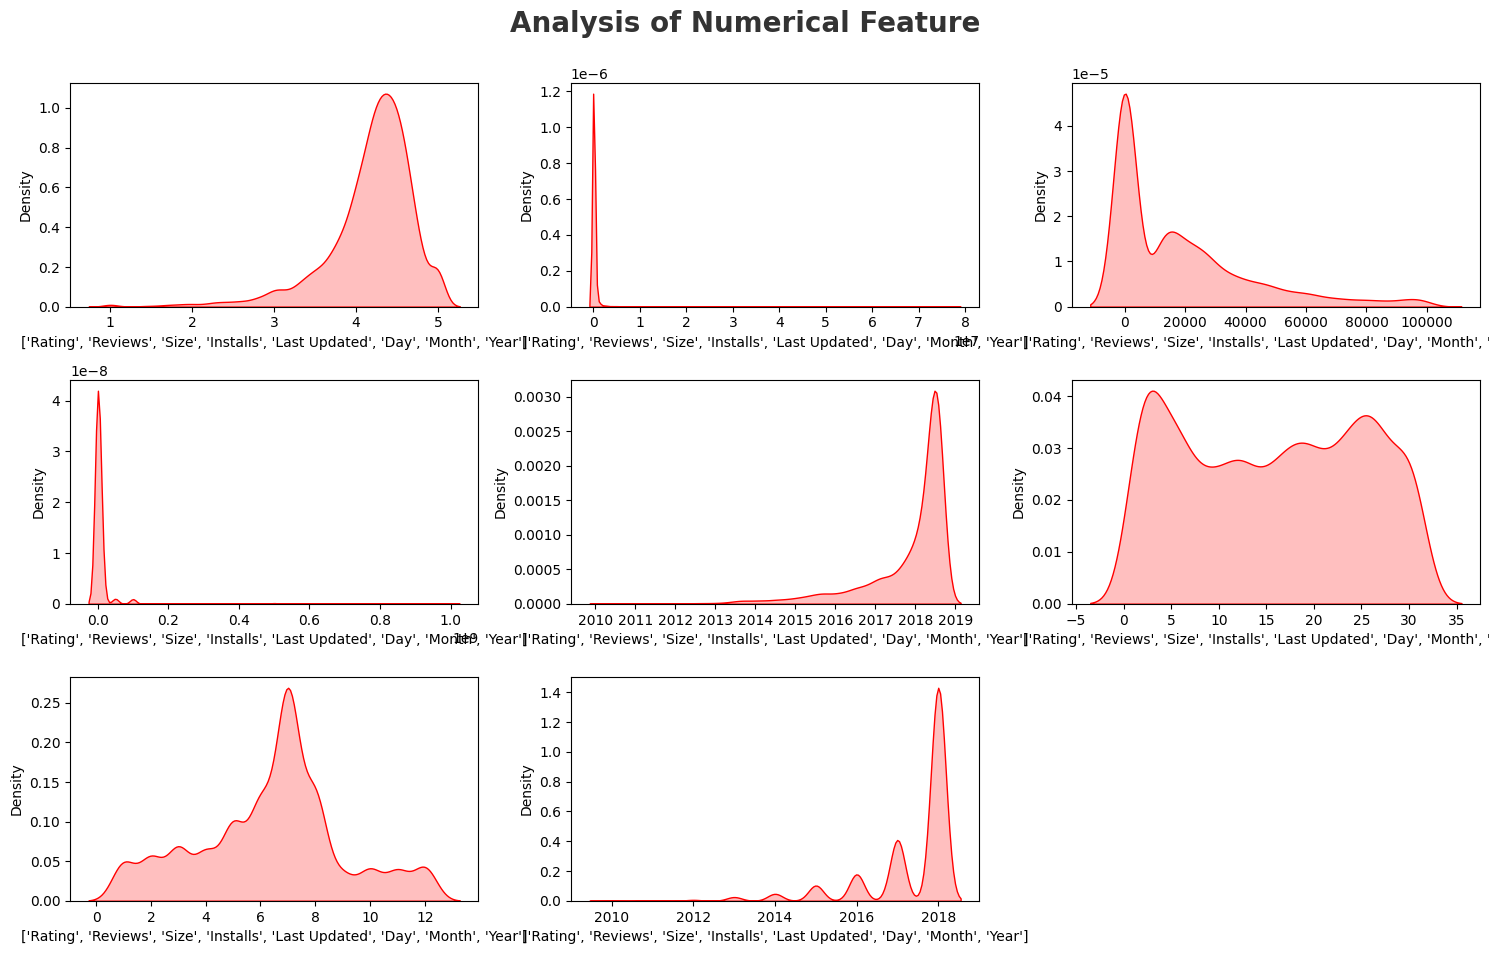

In [94]:
# visualise this proportion
plt.figure(figsize=(15,15))
plt.suptitle('Analysis of Numerical Feature', fontsize=20 , fontweight='bold', alpha=0.8,y=1)
# alpha=0.8: Sets the transparency of the title text. 1 is fully opaque, and 0 is fully transparent.
# y=1: Adjusts the vertical positioning of the title. 

for i in range(0 , len(numerical_features)):
    plt.subplot(5,3,i+1)
    sns.kdeplot(x=df_copy[numerical_features[i]] , shade=True , color='r')
    plt.xlabel(numerical_features)
    plt.tight_layout()

## Observations
- Rating and Year is left skewed while Reviews,Size,Installs and Price are right skewed

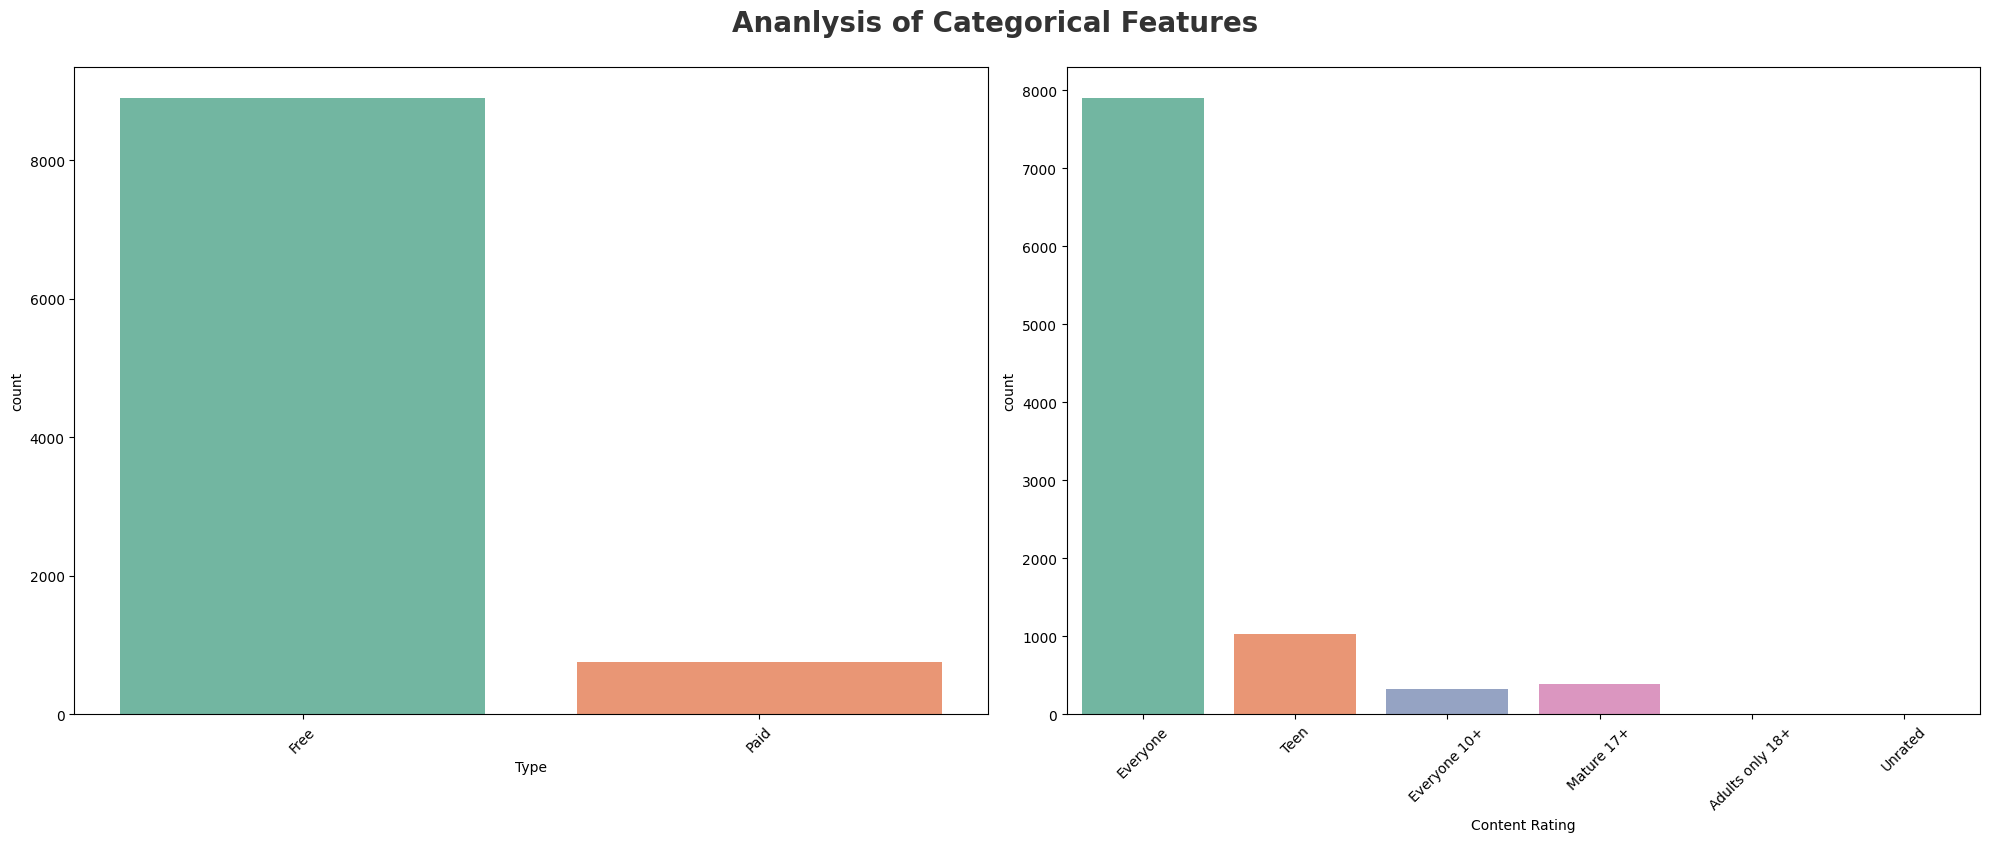

In [95]:
# Categorical Analysis
plt.figure(figsize=(20,15))
plt.suptitle("Ananlysis of Categorical Features" , fontsize=20, fontweight='bold', alpha=0.8, y=1)
category = ['Type', 'Content Rating']
for i in range(0 , len(category)):
    plt.subplot(2,2,i+1)
    sns.countplot(x=df_copy[category[i]], palette='Set2')
    plt.xlabel(category[i])
    plt.xticks(rotation=45)
    plt.tight_layout()

In [96]:
df_copy.head(2)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Day,Month,Year
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10000,Free,0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up,7,1,2018
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,500000,Free,0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,15,1,2018


<Axes: ylabel='count'>

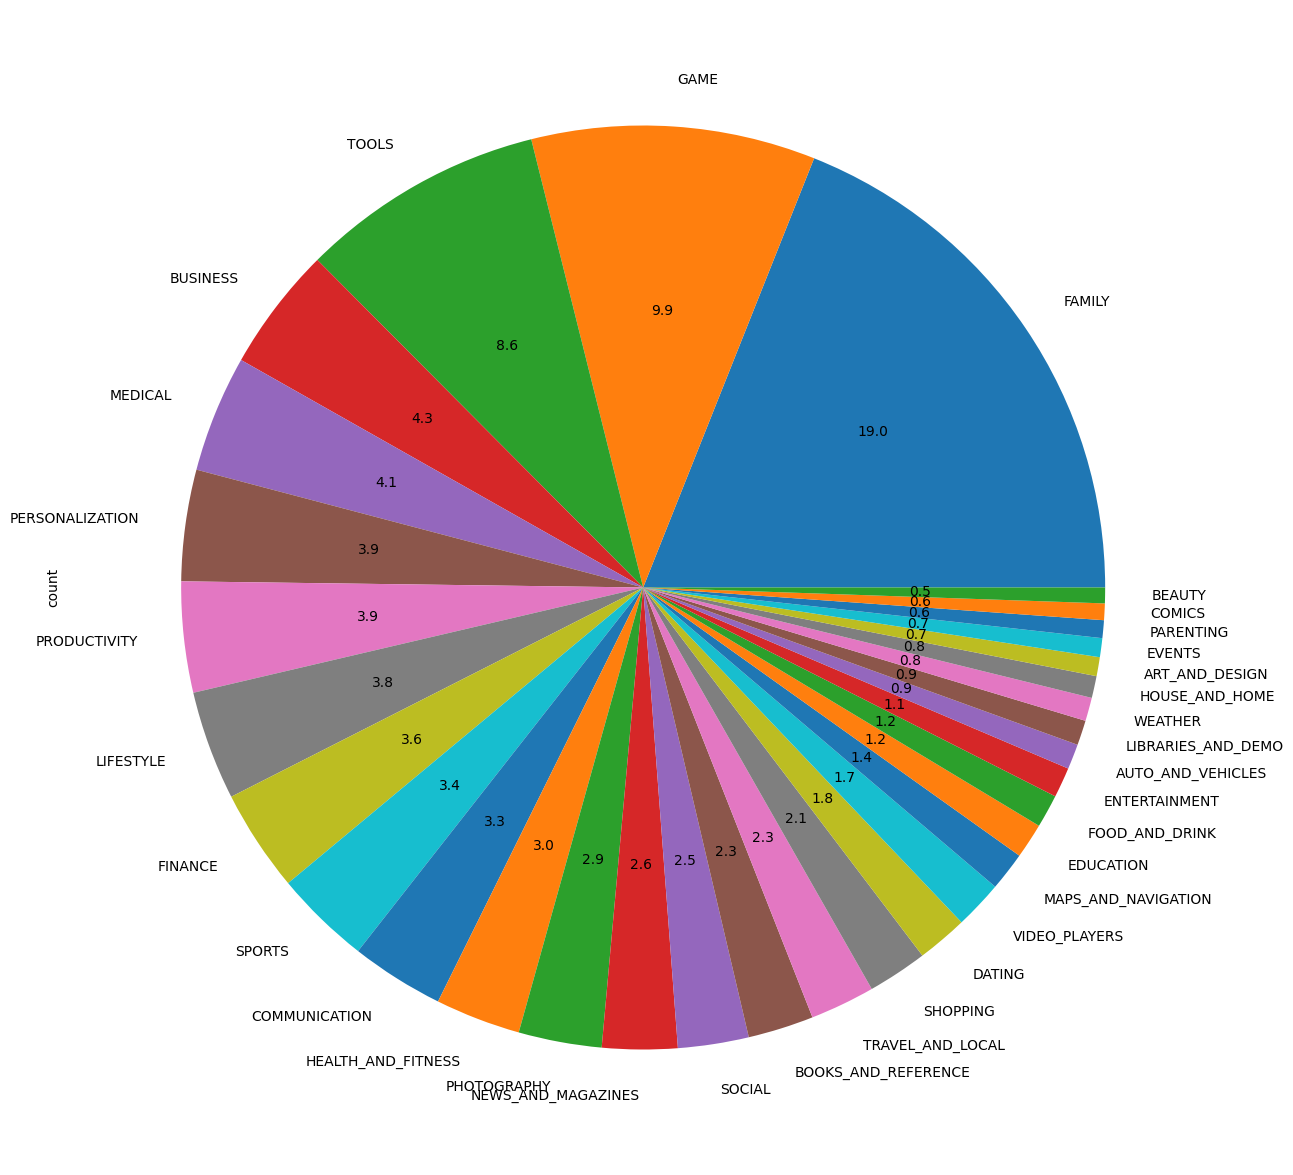

In [107]:
# Which is the most popular app category
df_copy['Category'].value_counts().plot.pie(y=df['Category'], figsize=(15,15) ,autopct='%1.1f')

## Observations

1. There are more kinds of apps in playstore which are under category of family, games & tools
2. Beatuty,comics,arts and weather kinds of apps are very less in playstore

In [108]:
# Top 10 app categories
category = pd.DataFrame(df['Category'].value_counts())
category.rename(columns={'Category':'Count'},inplace=True)

In [109]:
category

,count
Category,
FAMILY,1972
GAME,1144
TOOLS,843
MEDICAL,463
BUSINESS,460
PRODUCTIVITY,424
PERSONALIZATION,392
COMMUNICATION,387
SPORTS,384


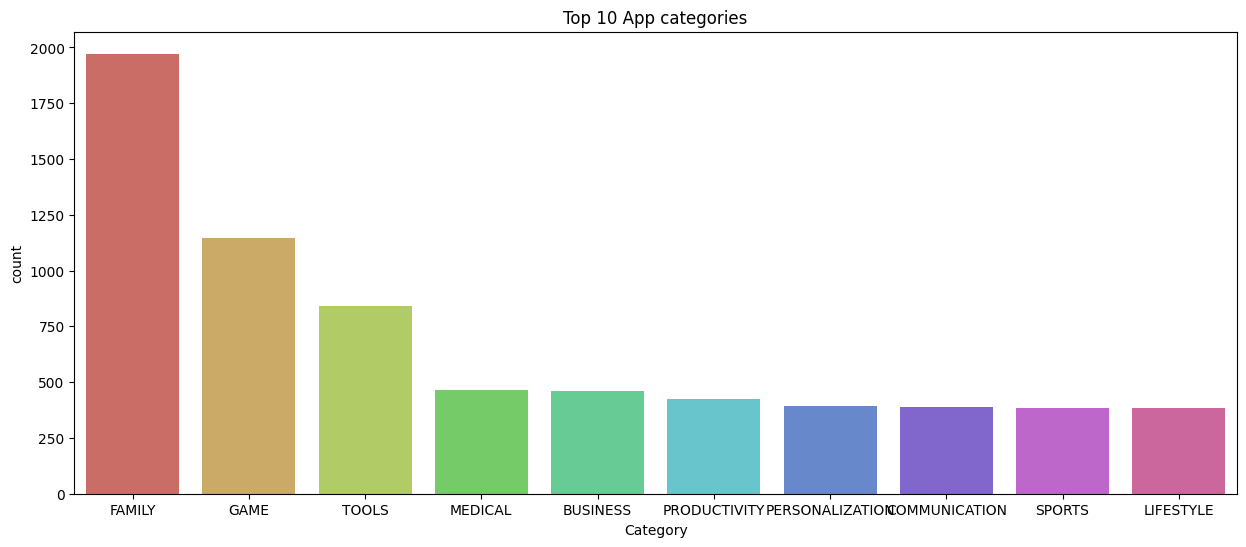

In [112]:
plt.figure(figsize=(15,6))
sns.barplot(x=category.index[:10], y='count', data= category[:10], palette='hls')
plt.title('Top 10 App categories')
plt.show()

## Internal Assignments
1. Which Category has largest number of installations??
2. What are the Top 5 most installed Apps in Each popular Categories ??
3. How many apps are there on Google Play Store which get 5 ratings??

## Which Category has largest number of installations??

Text(0.5, 1.0, 'Most Popular Category in play store')

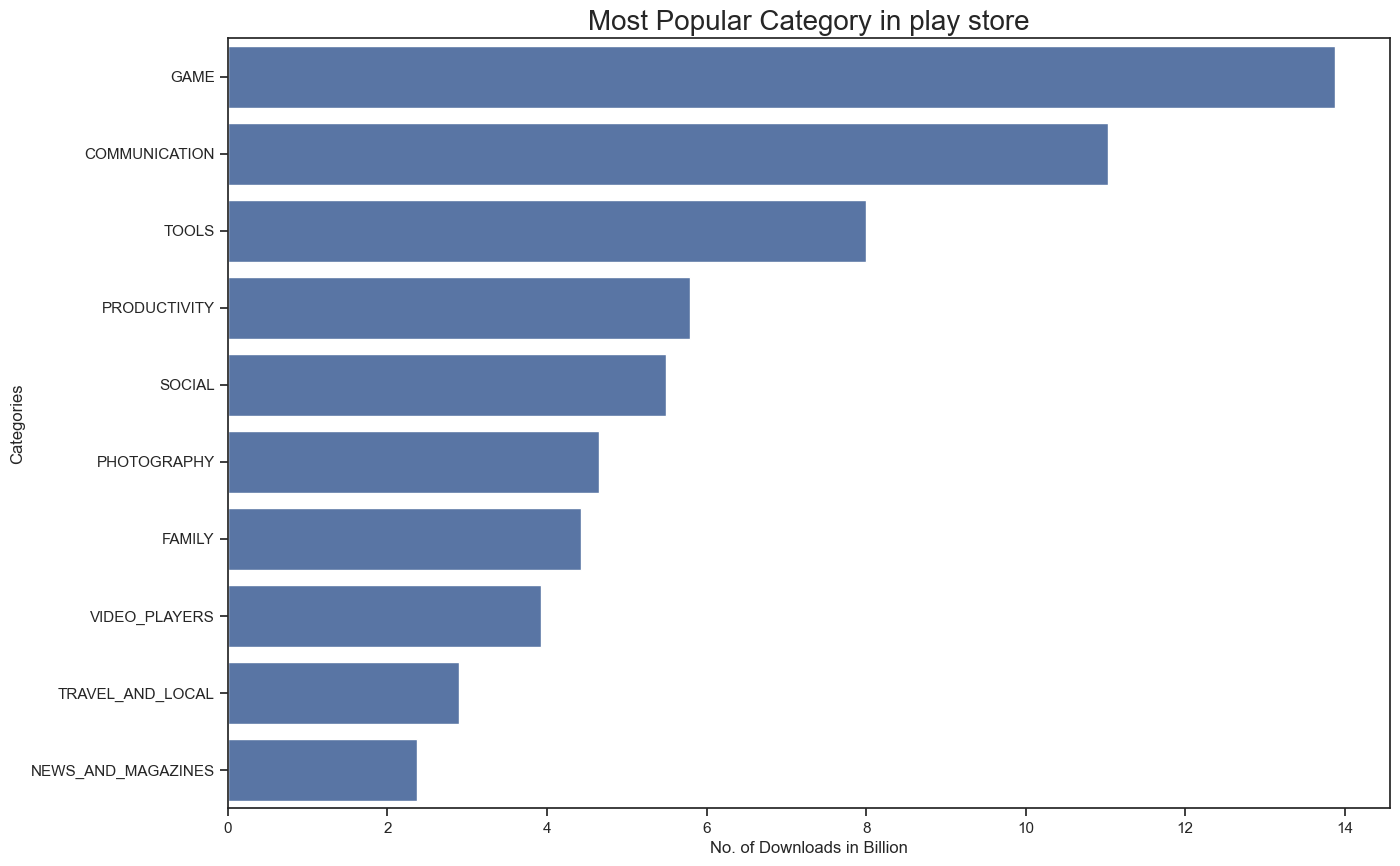

In [ ]:
largest_installations = df_copy.groupby(['Category'])['Installs'].sum().sort_values(ascending=False).reset_index()
largest_installations.Installs = largest_installations.Installs/1000000000
df_installs =  largest_installations.head(10)
plt.figure(figsize=(15,10))
sns.set_context("notebook" )
sns.set_style('ticks')


ax = sns.barplot(x='Installs' , y='Category', data=df_installs)
ax.set_xlabel('No. of Downloads in Billion')
ax.set_ylabel('Categories')
ax.set_title('Most Popular Category in play store' , size=20)


## Insights
1. Out of all the categories "GAME" has the most number of Installations.
2. With almost 35 Billion Installations GAME is the most popular Category in Google App store

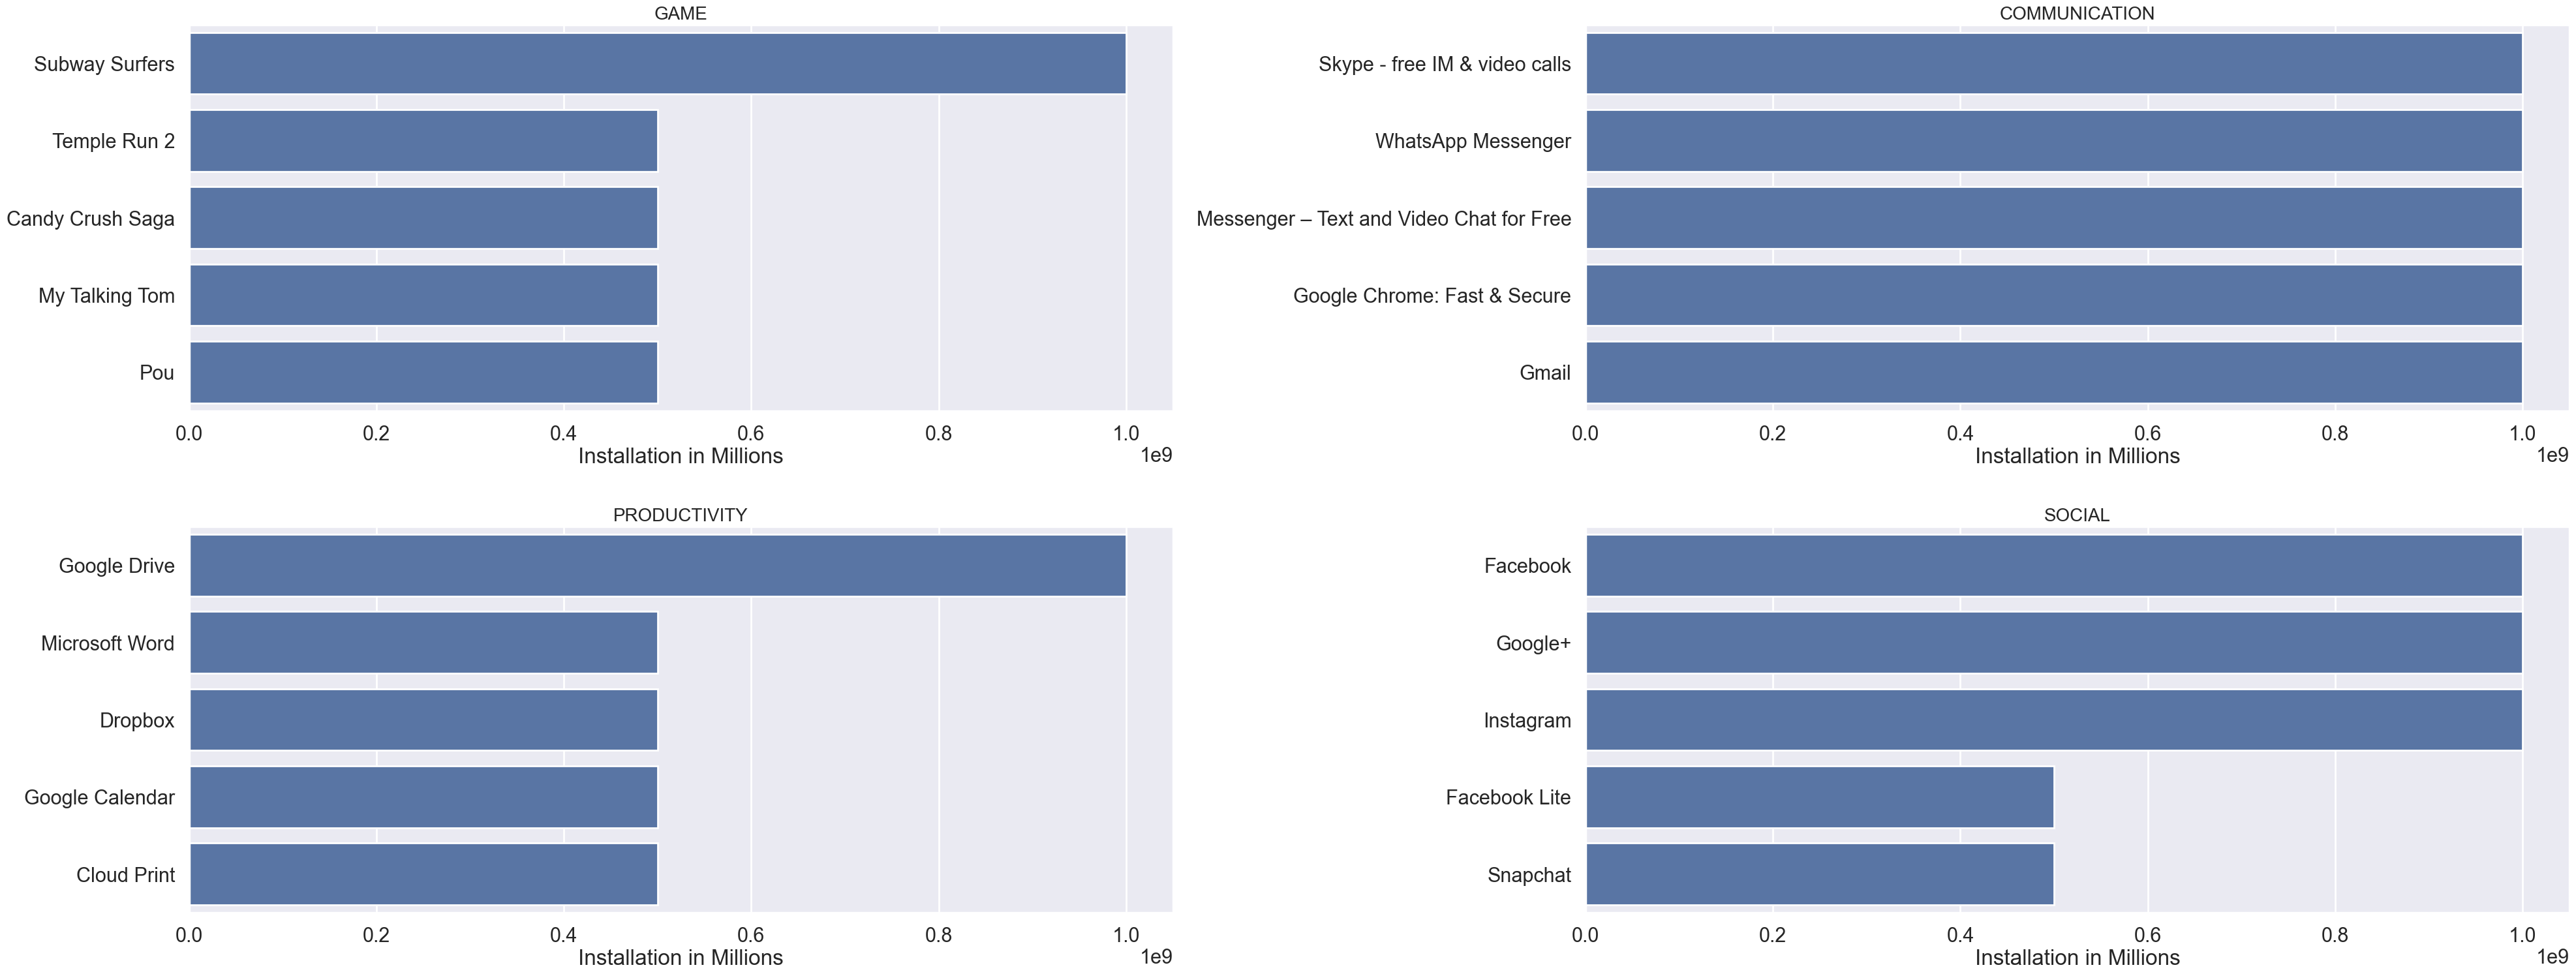

In [123]:
df_insights = df_copy.groupby(['Category' , 'App'])['Installs'].sum().reset_index()
df_insights = df_insights.sort_values('Installs' , ascending=False)
apps = ['GAME', 'COMMUNICATION', 'PRODUCTIVITY', 'SOCIAL']
sns.set_context("poster")
sns.set_style("darkgrid")

plt.figure(figsize=(40,30))

for i , app in enumerate(apps):
    df2 = df_insights[df_insights.Category == app]
    df3 = df2.head(5)
    plt.subplot(4,2,i+1)
    sns.barplot(data= df3,x= 'Installs' ,y='App' )
    plt.xlabel('Installation in Millions')
    plt.ylabel('')
    plt.title(app,size = 20)
    
plt.tight_layout()
plt.subplots_adjust(hspace= .3)
plt.show()


## Insights
- Most popular game is Subway Surfers.
- Most popular communication app is Hangouts.
- Most popular productivity app is Google Drive.
- Most popular social app is Instagram.

## How many apps are there on Google Play Store which get 5 ratings??

In [131]:
df_rating = df_copy.groupby(['Installs' ,'Category' , 'App'])['Rating'].sum().sort_values(ascending=False).reset_index()

top_rated_apps = df_rating[df_rating.Rating == 5.0]
print("Number of % rated Apps" , top_rated_apps.shape[0])
top_rated_apps

Number of % rated Apps 271


,Installs,Category,App,Rating
0,1,GAME,Mu.F.O.,5.0
1,500,TOOLS,Dr. ES PV Calculator,5.0
2,500,TOOLS,DG-App,5.0
3,500,PRODUCTIVITY,Ek Vote,5.0
4,10,MEDICAL,NCLEX Multi-topic Nursing Exam Review-Quiz & n...,5.0
...,...,...,...,...
266,1000,BOOKS_AND_REFERENCE,Tozer Devotional -Series 1,5.0
267,500,TOOLS,Victoria EC,5.0
268,500,TRAVEL_AND_LOCAL,CJ's Coffee Cafe,5.0
269,1,MEDICAL,KBA-EZ Health Guide,5.0


## Result
- There are 271 five rated apps on Google Play store
- Top most is 'CT Brain Interpretation' from 'Family' Category